In [71]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data_matrix = pd.read_csv('./data_matrix.csv', index_col=0)

In [75]:
classes = pd.read_csv('./classes.csv', index_col=0)['class']

In [77]:
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [79]:
pca = PCA()

In [81]:
principal_components = pca.fit_transform(data_matrix_standardized)

In [83]:
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')

Number of features in the data matrix: 10
Number of features in the principal components: 10


In [85]:
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

In [115]:
eigenvectors = pca.components_.T

In [117]:
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

In [119]:
pca = PCA(n_components=2)

In [121]:
principal_components = pca.fit_transform(data_matrix_standardized)

In [123]:
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 2
Number of Original Data Features: 10


In [129]:
principal_components_data = pd.DataFrame({
    'PC1' : principal_components[:, 0],
    'PC2' : principal_components[:, 1],
    'class': classes})

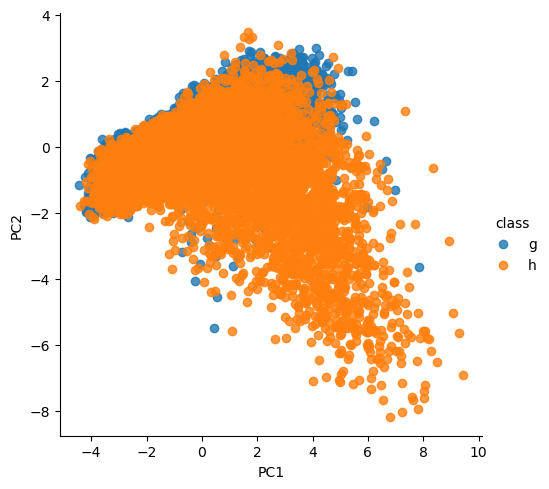

In [131]:
sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

In [135]:
y = classes.astype('category').cat.codes

In [139]:
pca_1=PCA(n_components=2)

In [141]:
x = pca_1.fit_transform(data_matrix_standardized)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [145]:
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(x_train, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [151]:
score_1=svc_1.score(x_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')

Score for model with 2 PCA features: 0.7417556157400031


In [166]:
first_two_original_features = [0, 1]

In [168]:
x_original = data_matrix_standardized.iloc[:, first_two_original_features]

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x_original, y, random_state=42, test_size=.33)

In [172]:
svc_2 = LinearSVC(random_state=0)
svc_2.fit(x_train, y_train)

LinearSVC(random_state=0)

In [180]:
score_2 = svc_2.score(x_test, y_test)
print(f'Score for model with 2 original features: {score_2}')

Score for model with 2 original features: 0.7192926557272582
